## Breast Cancer Wisconsin Dataset Analysis
### Week 3 HW 10.12.2019

Link to dataset and description:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Пошаговая инструкция:
1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
2. Посмотрите на базовые статистики датасета, средние, медианы, и т.д.
3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы
4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?
5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?
6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# in order to display all columns
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are no missing values in the dataset except for a completely empty column "Unnamed: 32". This column can simply be deleted.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
data = data.drop(["Unnamed: 32"], axis = 1)

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The scale of the variables varies greatly. The maximum value of area_worst is 4254, maximum value of symmetry_se is 0.7895.  It would be better to standardize data for future calculations.

In [8]:
data.describe(include =['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


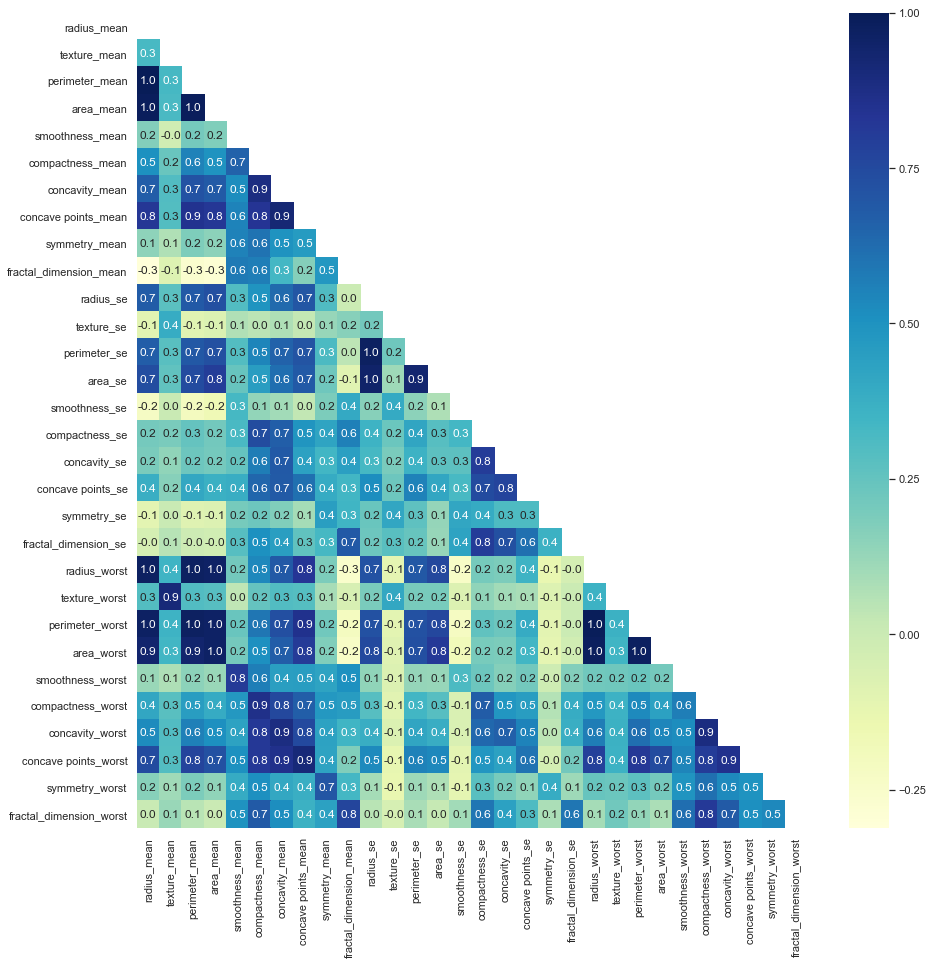

In [44]:
corr_matrix = data.drop('id', axis = 1).corr()
plt.figure(figsize=(15,15));
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,mask = mask, annot=True, cmap="YlGnBu", fmt='.1f')

    Obviously, there are highly correlated variables in the dataset. For example, correlation above 0.8 is available for the following variables:
    - radius_mean, concave_points_mean 0.8
    - radius_mean, area_worst 0.9
    - radius_mean, radius_worst 1.0
    - testure_mean, texure_worst
    - perimeter_mean, radius_mean - 1.0
    - perimeter_mean, concave_points_mean 0.9
    - perimeter_mean, perimeter_worst 1.0
    - perimeter_mean, area_worst 0.9
    - fractal_dimension_mean, fractal_dimension_worst 0.8
    - radius_worst, perimeter_worst 1.0
    and others...

    Let's check if they have a linear relationship

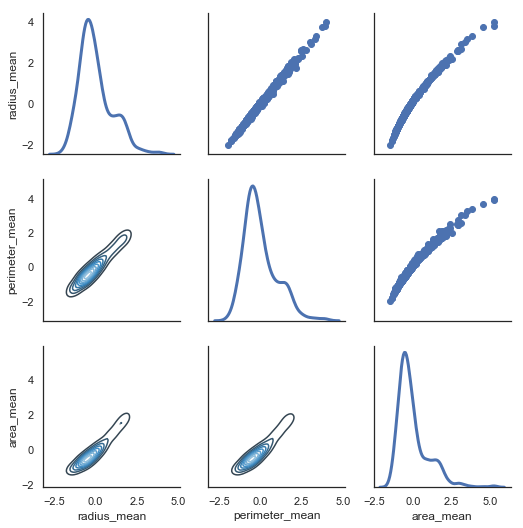

In [39]:
sns.set(style="white")
df = data_norm.loc[:,['radius_mean','perimeter_mean','area_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [10]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
data_num = data.drop(['id','diagnosis'], axis = 1)
data_norm = (data_num - data_num.mean()) / (data_num.std())  
data_norm['diagnosis'] = data.diagnosis

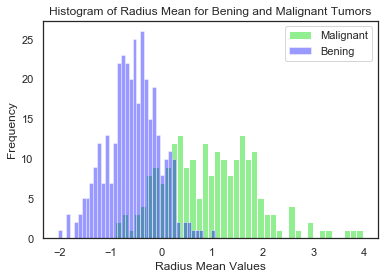

In [50]:
m = plt.hist(data_norm[data_norm["diagnosis"] == "M"].radius_mean, bins=40,label = "Malignant", color = 'lightgreen', alpha = 0.99)
b = plt.hist(data_norm[data_norm["diagnosis"] == "B"].radius_mean, bins=40,label = "Bening", color = 'blue', alpha = 0.4)
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

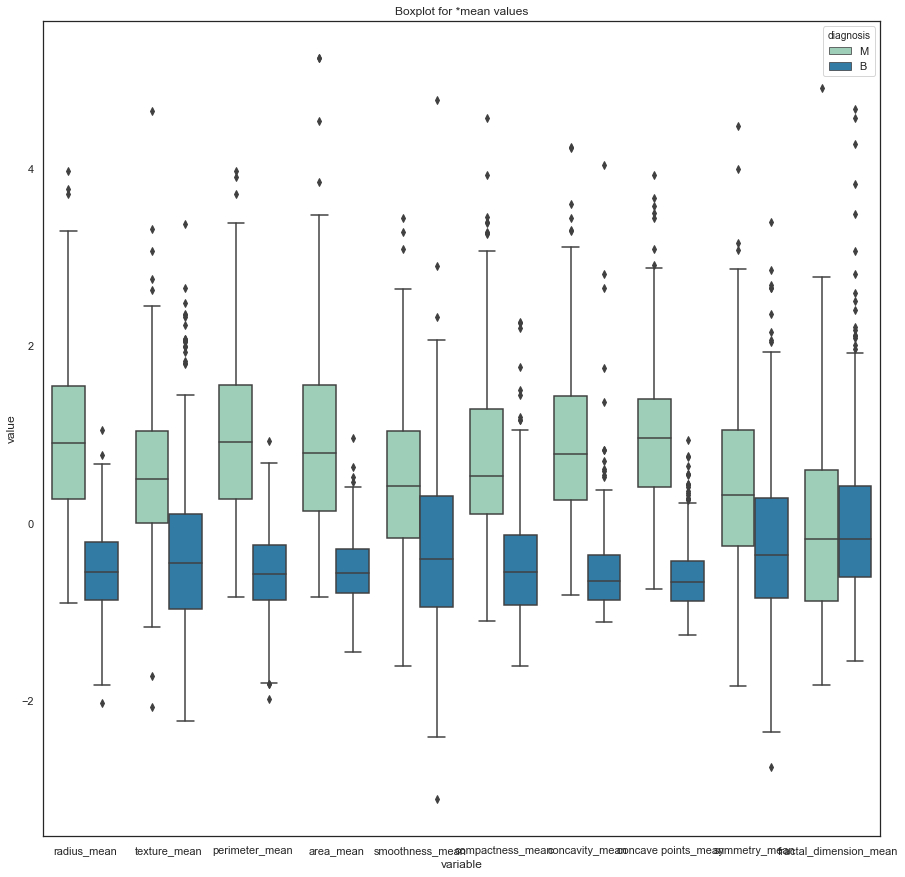

In [54]:
melted_data = pd.melt(data_norm, id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.figure(figsize = (15,15))
plt.title("Boxplot for *mean values")
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data, palette = "YlGnBu")
plt.show()

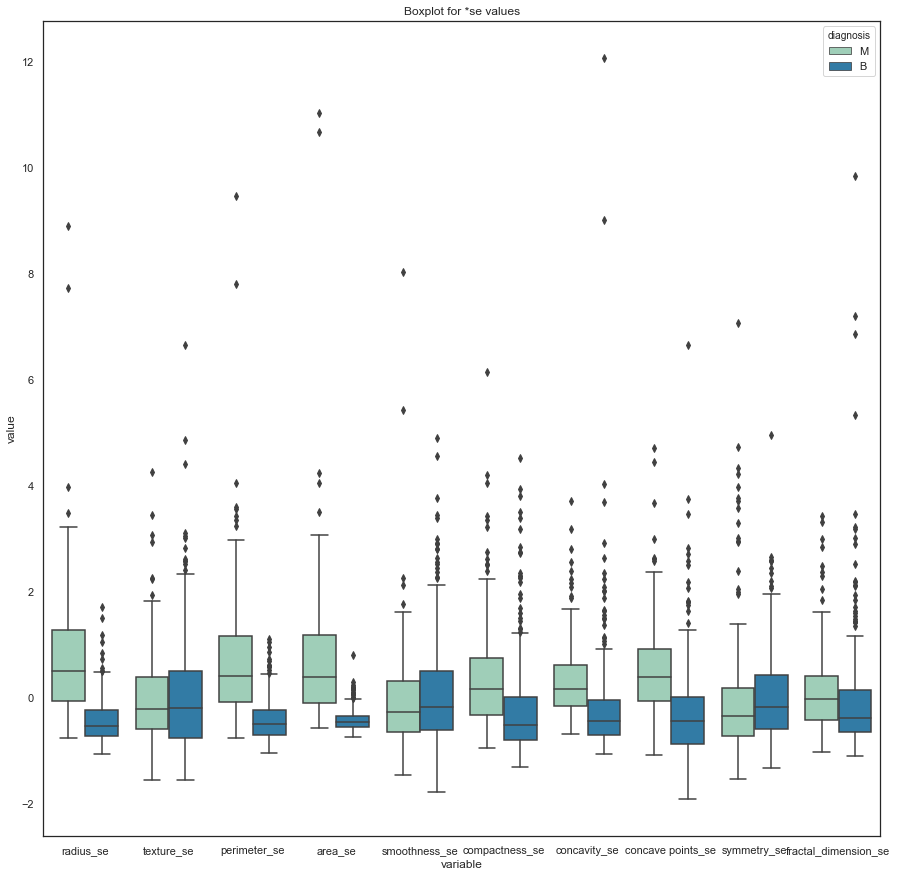

In [55]:
melted_data = pd.melt(data_norm, id_vars = "diagnosis", value_vars = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'])
plt.figure(figsize = (15,15))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data, palette = "YlGnBu")
plt.title("Boxplot for *se values")
plt.show()

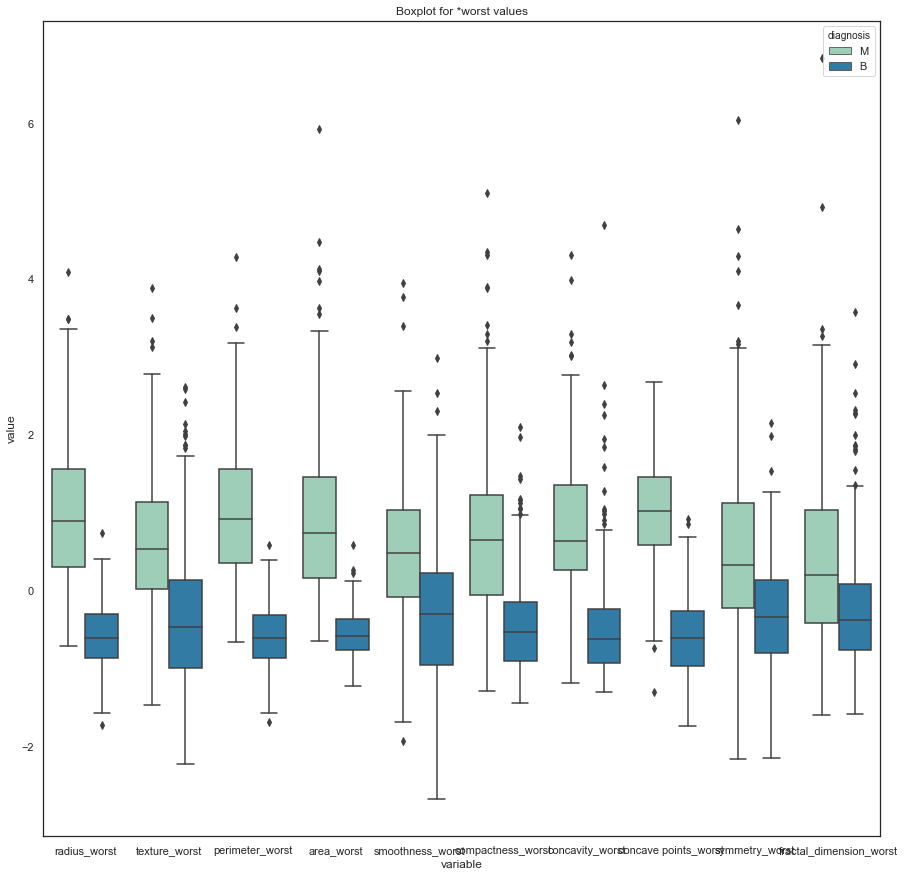

In [56]:
melted_data = pd.melt(data_norm, id_vars = "diagnosis", value_vars = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
plt.figure(figsize = (15,15))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data, palette = "YlGnBu")
plt.title("Boxplot for *worst values")
plt.show()

You can see outliers from box plots.
For example, I found 3 outlier in "radius_mean" variable. These values lie outside the 1,5 interquartile range (IQR) from the average value of the variable.

The distribution of most variables is clearly different for malignant and benign tumors. 
I assume that it will be easiest to determine the malignancy and benignity of a tumor by the following variables:
    - radius_mean,
    - perimeter_mean,
    - area_mean,
    - compactness_mean,
    - concavity_mean,
    - concave points_mean,
    - radius_se,
    - perimeter_se,
    - area_se,
    - radius_worst,
    - texture_worst,
    - perimeter_worst,
    - area_worst,
    - compactness_worst,
    - concavity_worst,
    - concave points_worst

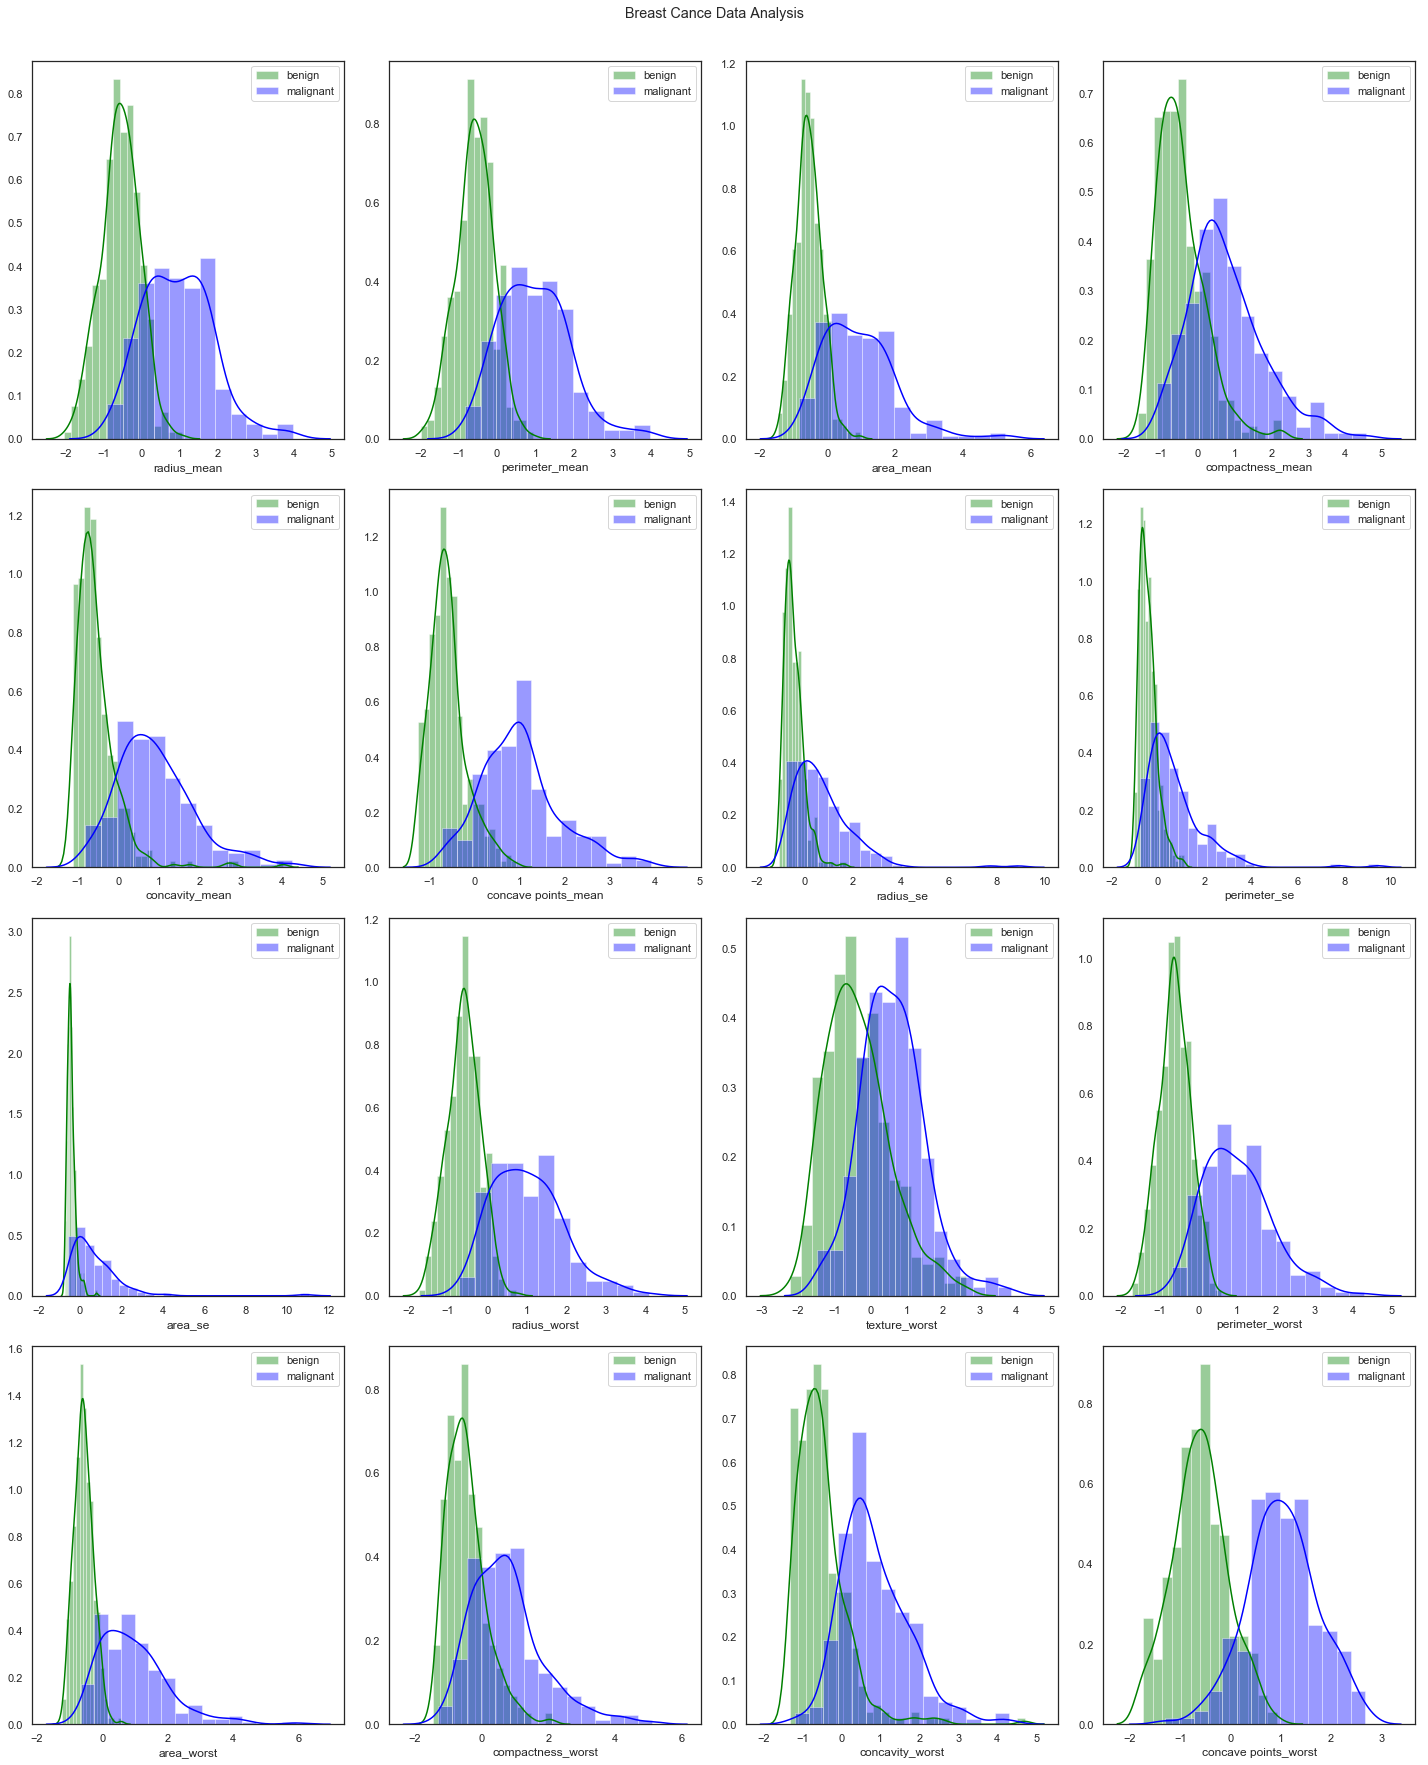

In [61]:
# Distribution of these variables
columns = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean',
           'concave points_mean', 'radius_se', 'perimeter_se', 'area_se' , 'radius_worst', 
           'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
fig = plt.figure(figsize = (20, 25))
j = 0
for i in columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sns.distplot(data_norm[i][data_norm['diagnosis']=='B'], color='green', label = 'Benign')
    sns.distplot(data_norm[i][data_norm['diagnosis']=='M'], color='blue', label = 'Malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()